Enter the x-coordinate of line number 1 :
-15
Enter the y-coordinate of line number 1 :
18
Enter the x-coordinate of line number 2 :
0
Enter the y-coordinate of line number 2 :
18
Enter the x-coordinate of line number 3 :
15
Enter the y-coordinate of line number 3 :
18
Enter the rms value of line-to-ground voltage(in kV) :750
Enter the Power supplied to the load : 1900
 RMS value of current in each phase :  1.4626213638944217


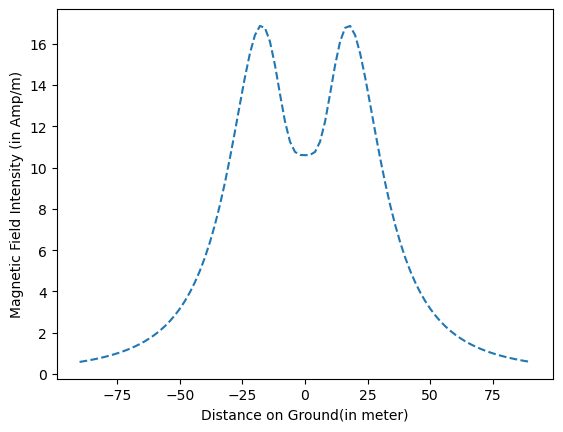

In [1]:
import math
import numpy
import numpy as np
import matplotlib.pyplot as plt
lcs=numpy.empty(shape=(3, 2), dtype=float)

for i in range(3):
    print("Enter the x-coordinate of line number", i+1, ":")
    lcs[i][0]=float(input())
    print("Enter the y-coordinate of line number", i+1, ":")
    lcs[i][1]=float(input())


V = float(input("Enter the rms value of line-to-ground voltage(in kV) :"))
P_l = float(input("Enter the Power supplied to the load : "))
Irms = P_l/(1.73205*V)
print(" RMS value of current in each phase : ",Irms)
#N = int(input("Enter the Number of subconductors in bundle :"))
#d = float(input("Enter the diameter of a subconductor in bundle(in meter) :"))
#r = float(d/2)
#B = float(input("Enter the bundle spacing(in meter) :"))
#R = float(B/(2*math.sin(math.pi/N)))

#S = float(lcs[2][0]-lcs[1][0])
#Req = float((N*r*(R**(N-1)))**(1/N))

#H = float(lcs[0][1])


#D=np.array([0,0,0], dtype=float)

mpcs = np.empty(91, dtype=float)

for i in range(91):
    mpcs[i]= -90+(2*i)
    
data = np.empty(91, dtype=float)

for i in range(91):
    K=numpy.empty(3,dtype=float)
    J=numpy.empty(3,dtype=float)

    for j in range(3):
        K[j]= float(((0+lcs[j][1])/(((mpcs[i]-lcs[j][0])**2)+((0+lcs[j][1])**2)))-((0-lcs[j][1])/(((mpcs[i]-lcs[j][0])**2)+((0-lcs[j][1])**2))))
        J[j]= float(((mpcs[i]-lcs[j][0])/(((mpcs[i]-lcs[j][0])**2)+((0-lcs[j][1])**2)))-((mpcs[i]-lcs[j][0])/(((mpcs[i]-lcs[j][0])**2)+((0+lcs[j][1])**2))))

    Hh_T= float((Irms/(2*math.pi))*(((K[0]*K[0])+(K[1]*K[1])+(K[2]*K[2])-(K[0]*K[1])-(K[1]*K[2])-(K[2]*K[0]))**(1/2)))
    Hv_T= float((Irms/(2*math.pi))*(((J[0]*J[0])+(J[1]*J[1])+(J[2]*J[2])-(J[0]*J[1])-(J[1]*J[2])-(J[2]*J[0]))**(1/2)))
    #Total Magnetic Field
    data[i]= float((((Hh_T)**2+(Hv_T)**2)**(1/2))*1000)
    
plt.plot(mpcs, data, linestyle='dashed')
plt.xlabel('Distance on Ground(in meter)')
plt.ylabel('Magnetic Field Intensity (in Amp/m)')
plt.show()